# Predicting Wine Quality

# Introduction
We are given datasets  related to red and white variants of the Portuguese "Vinho Verde" wine. Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

# Dataset description:
The dataset contains 6498 rows and 14 columns:  <br/>
1 - fixed acidity <br/>
2 - volatile acidity  <br/>
3 - citric acid  <br/>
4 - residual sugar  <br/>
5 - chlorides  <br/>
6 - free sulfur dioxide  <br/>
7 - total sulfur dioxide  <br/>
8 - density  <br/>
9 - pH  <br/>
10 - sulphates <br/> 
11 - alcohol <br/>
12 - quality (score between 0 and 10)  <br/>
13- good(1/0)  <br/>
14-Color(red/white)  <br/>



# Prerequisites:
* Python
* scikit-learn / sklearn
* Pandas
* NumPy
* matplotlib
* An environment to work in - something like Jupyter or Spyder


In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mywine=pd.read_csv("winequality.csv")

In [4]:
mywine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
print("Total Number of Rows and columns (Rows,Columns) : ",mywine.shape)
#Total Number of Rows and columns 

Total Number of Rows and columns (Rows,Columns) :  (6497, 14)


In [6]:
print(mywine.isnull().sum())
#to Chcek if there is any null value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64


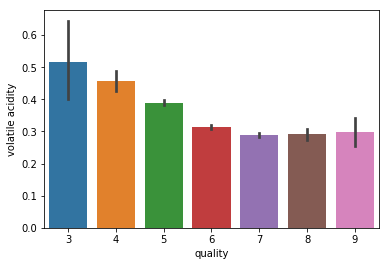

In [7]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = mywine)

<b>Observation:</b> Volatile acidity decrease as quality increases

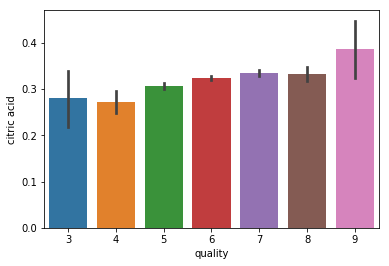

In [8]:
sns.barplot(x = 'quality', y = 'citric acid', data = mywine)

<b>Observation:</b>Citric Acid Increases as quality increases

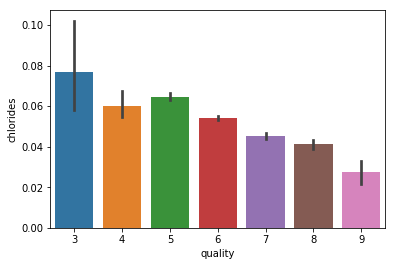

In [9]:
sns.barplot(x = 'quality', y = 'chlorides', data = mywine)

<b>Observation:</b> Chloride decrease as quality increases

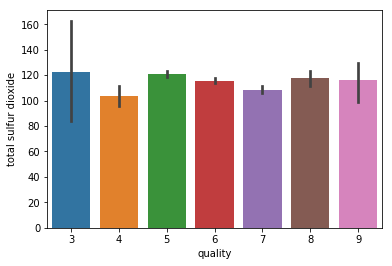

In [10]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = mywine)

<b>Observation:</b> Total Sulfer Dioxide is evenly spread over quality

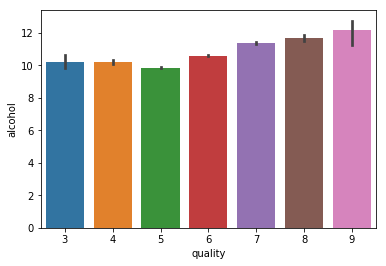

In [11]:
sns.barplot(x = 'quality', y = 'alcohol', data = mywine)

<b>Observation:</b> Content of Alcohol Increases as quality increases

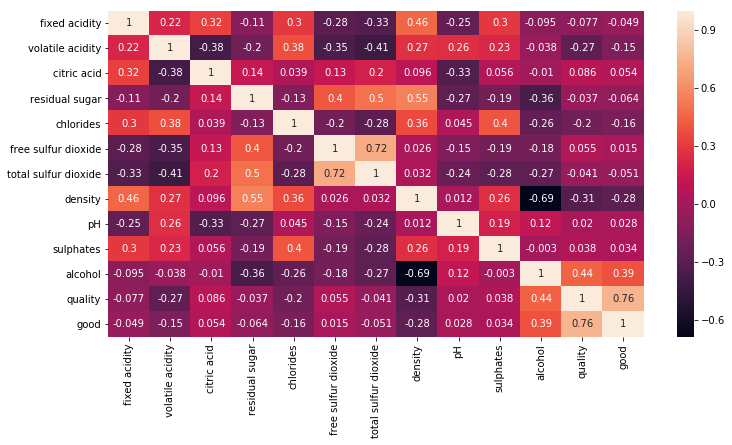

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(mywine.corr(),annot=True)

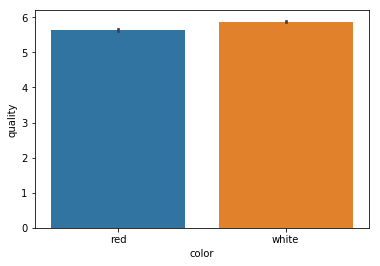

In [13]:
sns.barplot(x='color',y='quality', data=mywine)

In [14]:
mywine[['color']]=mywine.color.map(dict(white=1, red=0))
#Here red Wine is denoted as 0 and White wine is denoted as 1

In [15]:
x=mywine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good', 'color']]

In [16]:
y=mywine[['quality']]

In [17]:
mywine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Different ML Algorithms that are applied
* Logistic Regression
* Naive Bayes
* KNN
* Decision Tree
* Random Forest
* SVM

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

In [19]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test= sc.fit_transform(x_test)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
mymodel1 = LogisticRegression()
mymodel1.fit(x_train,y_train)

C:\Users\hp\Downloads\ana\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred1 = mymodel1.predict(x_test)
#mymodel1.score(x_test,y_test)

In [22]:
from sklearn.metrics import accuracy_score
mymodel1_score=accuracy_score(y_test,y_pred1)
print("Score of Model 1 is:",mymodel1_score)

Score of Model 1 is: 0.6907692307692308


Confusion Matrix of Model 1


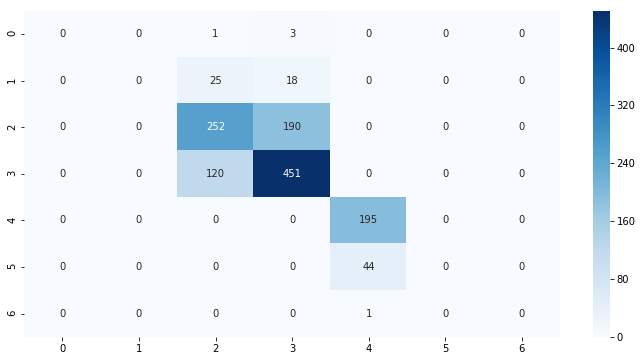

In [23]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Model 1")
mymodel1_confusion=confusion_matrix(y_test,y_pred1)
#print(mymodel1_confusion)
plt.figure(figsize=(12,6))
sns.heatmap(mymodel1_confusion,annot=True,cmap='Blues',fmt='g')

# Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
mymodel2 = MultinomialNB()
mymodel2.fit(x_train,y_train)

C:\Users\hp\Downloads\ana\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred2 = mymodel2.predict(x_test)
#mymodel2.score(x_test,y_test)

In [26]:
from sklearn.metrics import accuracy_score
mymodel2_score=accuracy_score(y_test,y_pred2)
print("Score of Model 2 is:",mymodel2_score)

Score of Model 2 is: 0.5123076923076924


Confusion Matrix of Model 2


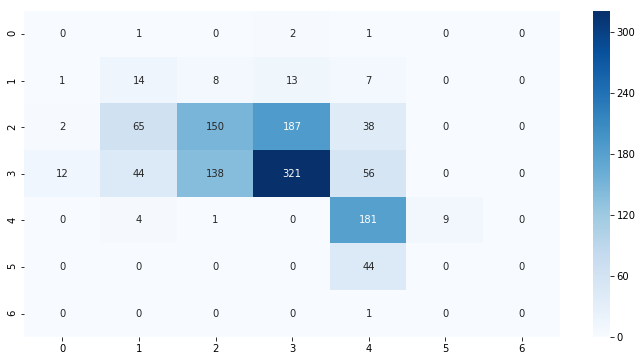

In [27]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Model 2")
mymodel2_confusion=confusion_matrix(y_test,y_pred2)
#print(mymodel2_confusion)
plt.figure(figsize=(12,6))
sns.heatmap(mymodel2_confusion,annot=True,cmap='Blues',fmt='g')

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
mymodel3 = KNeighborsClassifier()
mymodel3.fit(x_train, y_train)

C:\Users\hp\Downloads\ana\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred3 = mymodel3.predict(x_test)
#mymodel3.score(x_test,y_test)

In [30]:
from sklearn import metrics
mymodel3_score=metrics.accuracy_score(y_test,y_pred3)
print("Score of Model 3 is:",mymodel3_score)

Score of Model 3 is: 0.5023076923076923


Confusion Matrix of Model 3


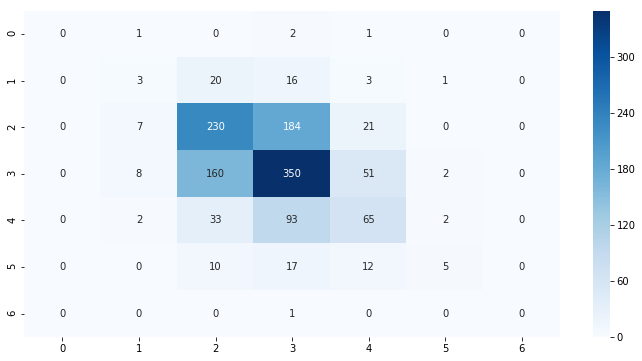

In [31]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Model 3")
mymodel3_confusion=confusion_matrix(y_test,y_pred3)
#print(mymodel3_confusion)
plt.figure(figsize=(12,6))
sns.heatmap(mymodel3_confusion,annot=True,cmap='Blues',fmt='g')

# Decision Tree (gini)

In [32]:
from sklearn.tree import DecisionTreeClassifier
mymodel4 = DecisionTreeClassifier(criterion='gini')
mymodel4.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
y_pred4 = mymodel4.predict(x_test)
#mymodel4.score(x_test,y_test)

In [34]:
from sklearn import metrics
mymodel4_score=metrics.accuracy_score(y_test,y_pred4)
print("Score of Model 4 is:",mymodel4_score)

Score of Model 4 is: 0.7053846153846154


Confusion Matrix of Model 4


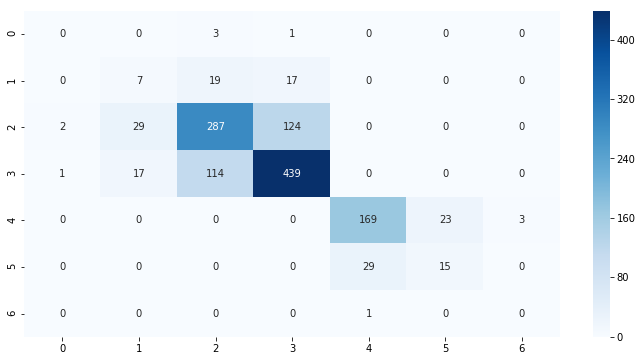

In [35]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Model 4")
mymodel4_confusion=confusion_matrix(y_test,y_pred4)
#print(mymodel4_confusion)
plt.figure(figsize=(12,6))
sns.heatmap(mymodel4_confusion,annot=True,cmap='Blues',fmt='g')

# Random Forest (gini)

In [36]:
from sklearn.ensemble import RandomForestClassifier
mymodel5 = RandomForestClassifier(criterion='gini')
mymodel5.fit(x_train,y_train)

C:\Users\hp\Downloads\ana\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
y_pred5 = mymodel5.predict(x_test)
#mymodel5.score(x_test,y_test)

In [38]:
from sklearn import metrics
mymodel5_score=metrics.accuracy_score(y_test,y_pred5)
print("Score of Model 5 is:",mymodel5_score)

Score of Model 5 is: 0.7669230769230769


Confusion Matrix of Model 5


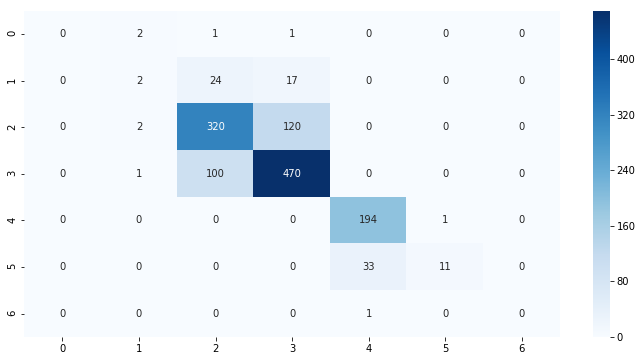

In [39]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Model 5")
mymodel5_confusion=confusion_matrix(y_test,y_pred5)
#print(mymodel5_confusion)
plt.figure(figsize=(12,6))
sns.heatmap(mymodel5_confusion,annot=True,cmap='Blues',fmt='g')

# SVM

In [40]:
from sklearn.svm import SVC
mymodel6 = SVC(kernel='linear')
mymodel6.fit(x_train,y_train)

C:\Users\hp\Downloads\ana\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred6 = mymodel6.predict(x_test)
#mymodel6.score(x_test,y_test)

In [42]:
from sklearn import metrics
mymodel6_score=metrics.accuracy_score(y_test,y_pred6)
print("Score of Model 6 is:",mymodel6_score)

Score of Model 6 is: 0.6976923076923077


Confusion Matrix of Model 6


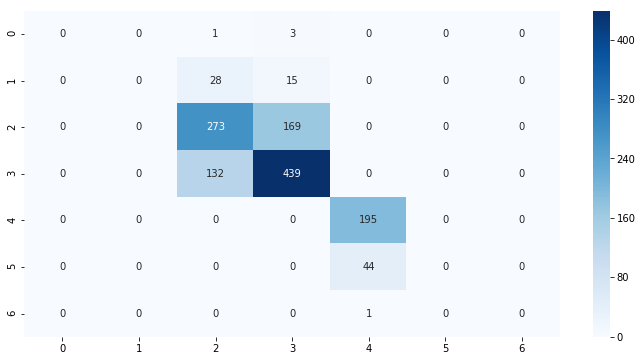

In [43]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of Model 6")
mymodel6_confusion=confusion_matrix(y_test,y_pred6)
#print(mymodel6_confusion)
plt.figure(figsize=(12,6))
sns.heatmap(mymodel6_confusion,annot=True,cmap='Blues',fmt='g')

# Comparison of different Models

In [44]:
allscore = [mymodel1_score,mymodel2_score,mymodel3_score,mymodel4_score,mymodel5_score,mymodel6_score]

alldata = {'Algorithm' : ['Logistic Regression',"Naive Bayes",'KNN',"Decision Tree(gini)",'Random Forest(gini)','SVM'],'Score' : allscore
       }

compare =pd.DataFrame(alldata)

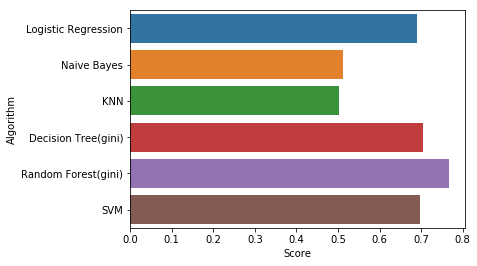

In [45]:
sns.barplot(y=compare.Algorithm, x=compare.Score)

In [46]:
compare

,Algorithm,Score
0,Logistic Regression,0.690769
1,Naive Bayes,0.512308
2,KNN,0.502308
3,Decision Tree(gini),0.705385
4,Random Forest(gini),0.766923
5,SVM,0.697692


<b>Observation: </b> Most Accurate prediciton of quality of wine can be achieved through Random Forest Model.
